In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cairo
import math
import numpy.random as rd
import icon_util_v2
import h5py
import cv2
from skimage.draw import random_shapes
hdf5_file = h5py.File('LLD-icon.hdf5', 'r')
images, _ = (hdf5_file['data'], hdf5_file['labels/resnet/rc_64'])
images = images[:100]
# transpose the images because they're stored in a weird color channel first format, as indicated by shape[0] being 3
images = [np.transpose(i) if i.shape[0] == 3 else i for i in images]
print(len(images))
def cvread(path):
    return cv2.resize(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)/255, (32,32))
tdl=cvread('tdl.png')
tdl2=cvread('tdl2.png')
tokyo=cvread('tokyo.png')
tokyo2=cvread('tokyo2.png')

100


In [6]:

def genrot(rot):
    return np.array([[np.cos(rot),np.sin(rot)],
                    [-np.sin(rot),np.cos(rot)]])
def framegrid(frame):
    sx,sy=frame["scale"]
    xx,yy=np.mgrid[:sx,:sy]
    ox,oy=frame["origin"]
    xx=xx/sx-ox
    yy=yy/sy-oy
    xx,yy=np.einsum('ji,mni->jmn',frame["rotation"],np.dstack([xx,yy]))
    return xx,yy
def stamp(img, shape, color):
    return np.where(np.expand_dims(shape,-1), color, img)
def circle(frame,radius):
    xx,yy=framegrid(frame)
    return ((xx)**2 + (yy)**2) < radius**2

In [7]:
def add_bg(fg,fg_mask,bg1=None,bg2=None):
    frame={"scale":(32,32),
           "origin":(0.5,0.5),
           "rotation":genrot(0)}
    bg1=bg1 or rd.rand(3)
    bg2=bg2 or rd.rand(3)
    cst=circle(frame,0.4)
    bg=np.where(np.expand_dims(fg_mask,2),fg/fg.max(),bg1)
    return np.where(np.expand_dims(cst, 2), bg, bg2)
def autobg(fg,method="color"):
    if method=="color":
        rids,iids,bgid=icon_util_v2.color_segments(fg)
        mask=rids!=bgid
    else:
        sfg=fg.sum(2).astype(np.int32)
        t=threshold_otsu(sfg)
        mask=sfg<t
    return add_bg(fg,mask)

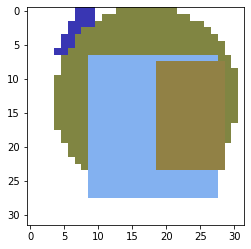

In [8]:
fake_image,_=random_shapes((32, 32), min_shapes=2, max_shapes=4,
                         min_size=10, allow_overlap=True)
plt.imshow(fake_image)

TypeError: Image data of dtype object cannot be converted to float

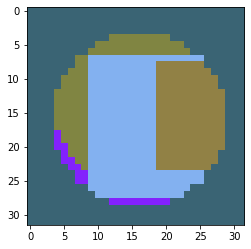

In [13]:
plt.imshow(autobg(fake_image))
plt.imshow(icon_util_v2.split_image(fake_image,method="contour")[0])

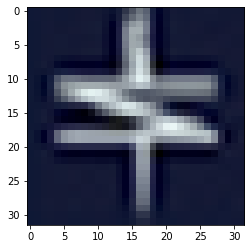

In [385]:
plt.imshow(images[7])

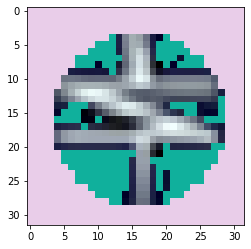

In [386]:
plt.imshow(autobg(images[7]))

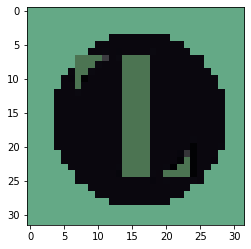

In [387]:
plt.imshow(autobg(tokyo,"otsu"))

In [349]:
cv2.imread('tdl.png').shape

(403, 405, 3)

In [54]:
cr=cairo.Context(s)

In [55]:
cr.set_source_rgb(1.0,1.0,1.0)

In [56]:
cr.paint()
cr.arc(16,16,4,0,2*math.pi)
cr.set_line_width(3)
cr.set_source_rgb(1.0,0.0,0.0)
cr.stroke()

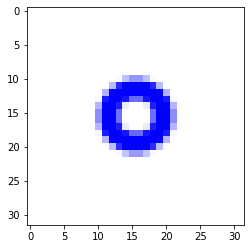

In [57]:
plt.imshow(templ)

In [59]:
xx

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [29, 29, 29, ..., 29, 29, 29],
       [30, 30, 30, ..., 30, 30, 30],
       [31, 31, 31, ..., 31, 31, 31]])

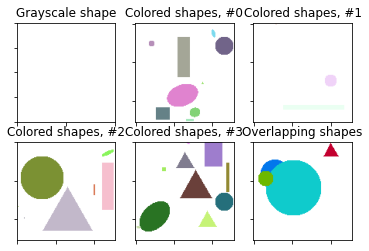

In [64]:
import matplotlib.pyplot as plt





# We can visualize the images.
fig, axes = plt.subplots(nrows=2, ncols=3)
ax = axes.ravel()
ax[0].set_title('Grayscale shape')

# The generated images can be much more complex. For example, let's try many
# shapes of any color. If we want the colors to be particularly light, we can
# set the `intensity_range` to an upper subrange of (0,255).
image1, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((100, 255),))

# Moar :)
image2, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((200, 255),))
image3, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((50, 255),))
image4, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((0, 255),))

for i, image in enumerate([image1, image2, image3, image4], 1):
    ax[i].imshow(image)
    ax[i].set_title(f"Colored shapes, #{i-1}")

# These shapes are well suited to test segmentation algorithms. Often, we
# want shapes to overlap to test the algorithm. This is also possible:
image, _ = random_shapes((128, 128), min_shapes=2, max_shapes=4,
                         min_size=20, allow_overlap=True)
ax[5].imshow(image)
ax[5].set_title('Overlapping shapes')

for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])

plt.show()


In [161]:
im1,_=random_shapes((28, 28), min_shapes=2, max_shapes=4,
                         min_size=10, allow_overlap=True)


In [155]:
from skimage.filters import threshold_otsu

In [162]:
threshold_otsu(im1)

<ipython-input-162-a53cd524d92f>:1: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (28, 28, 3) looks like an RGB image
  threshold_otsu(im1)


131

In [167]:
im1.sum(2) < 250*3

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True

In [313]:
def add_bg(fg,fg_mask,bg1=None,bg2=None):
    frame={"scale":(32,32),
           "origin":(0.5,0.5),
           "rotation":genrot(0)}
    bg1=bg1 or rd.rand(3)
    bg2=bg2 or rd.rand(3)
    cst=circle(frame,0.4)
    bg=np.where(np.expand_dims(fg_mask,2),fg/fg.max(),bg1)
    return np.where(np.expand_dims(cst, 2), bg, bg2)
def autobg(fg,method="color"):
    if method=="color":
        print("here")
        rids,iids,bgid=icon_util_v2.color_segments(fg)
        mask=rids!=bgid
    else:
        sfg=fg.sum(2).astype(np.int32)
        t=threshold_otsu(sfg)
        mask=sfg<t
    return add_bg(fg,mask)

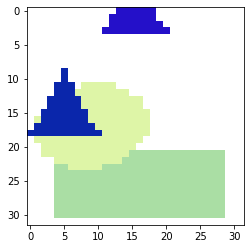

In [291]:
im1,_=random_shapes((32, 32), min_shapes=2, max_shapes=4,
                         min_size=10, allow_overlap=True)
plt.imshow(im1)

here


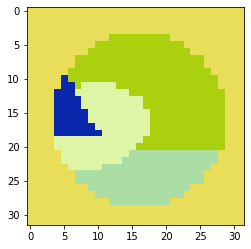

In [297]:
im2= autobg(im1)
plt.imshow(im2)

In [200]:
rd.rand(3)*255

array([ 34.98998929,  22.84690373, 223.11996693])

In [214]:
np.expand_dims(fg_mask, 0).shape

(1, 32, 32)

In [272]:
fg=im1
fg_mask=im1.sum(2) < 250*3
frame={"scale":(32,32),
       "origin":(0.5,0.5),
       "rotation":genrot(0)}
bg1=bg1 or rd.rand(3)
bg2=bg2 or rd.rand(3)
cst=circle(frame,0.4)
bg=np.where(np.expand_dims(fg_mask,2),fg/fg.max(),bg1)
im3=np.where(np.expand_dims(cst, 2), bg, bg2)

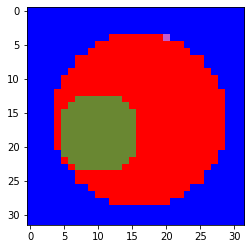

In [274]:
plt.imshow(im3)

In [228]:
fg.shape

(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


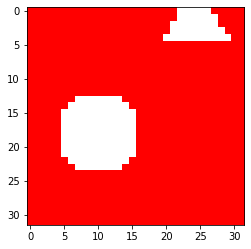

In [265]:
plt.imshow(np.where(np.expand_dims(fg_mask,2),bg,bg1))

In [240]:
np.expand_dims(fg_mask,2).shape

(32, 32, 1)

In [256]:
np.array(3*[fg_mask]).transpose(0,2,1).shape


(3, 32, 32)

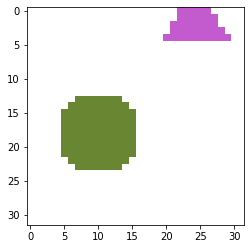

In [258]:
plt.imshow(fg)

In [268]:
fg.max()

255

here


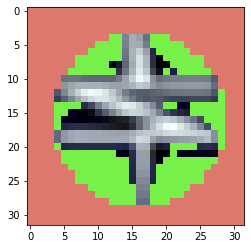